## Univariate

Nr. Records = 5844
First timestamp: 2006-01-01 00:00:00
Last timestamp: 2021-12-31 00:00:00


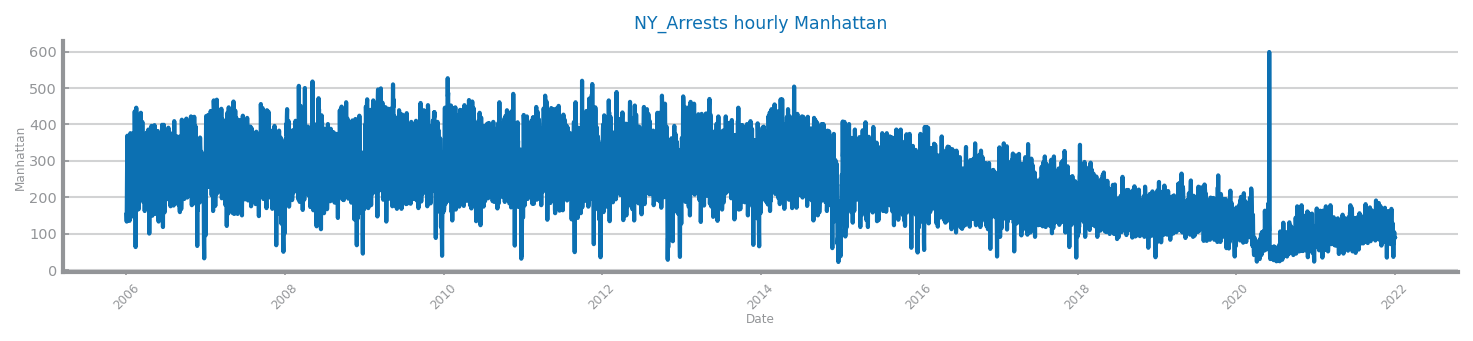

In [1]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "NY_Arrests"
target = "Manhattan"

# Load the dataset
data: DataFrame = read_csv(
    "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/forecast_ny_arrests.csv",
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=["Date"],  # Parse the Date column
    infer_datetime_format=True,
)

# Set the Date column as the index
data.set_index("Date", inplace=True)

# Extract the target series (Manhattan)
series: Series = data[target]

# Print profiling information
print("Nr. Records =", series.shape[0])
print("First timestamp:", series.index[0])
print("Last timestamp:", series.index[-1])

# Plot the univariate time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)
show()


## Multivariate

Nr. Records = (5844, 5)
First timestamp: 2006-01-01 00:00:00
Last timestamp: 2021-12-31 00:00:00


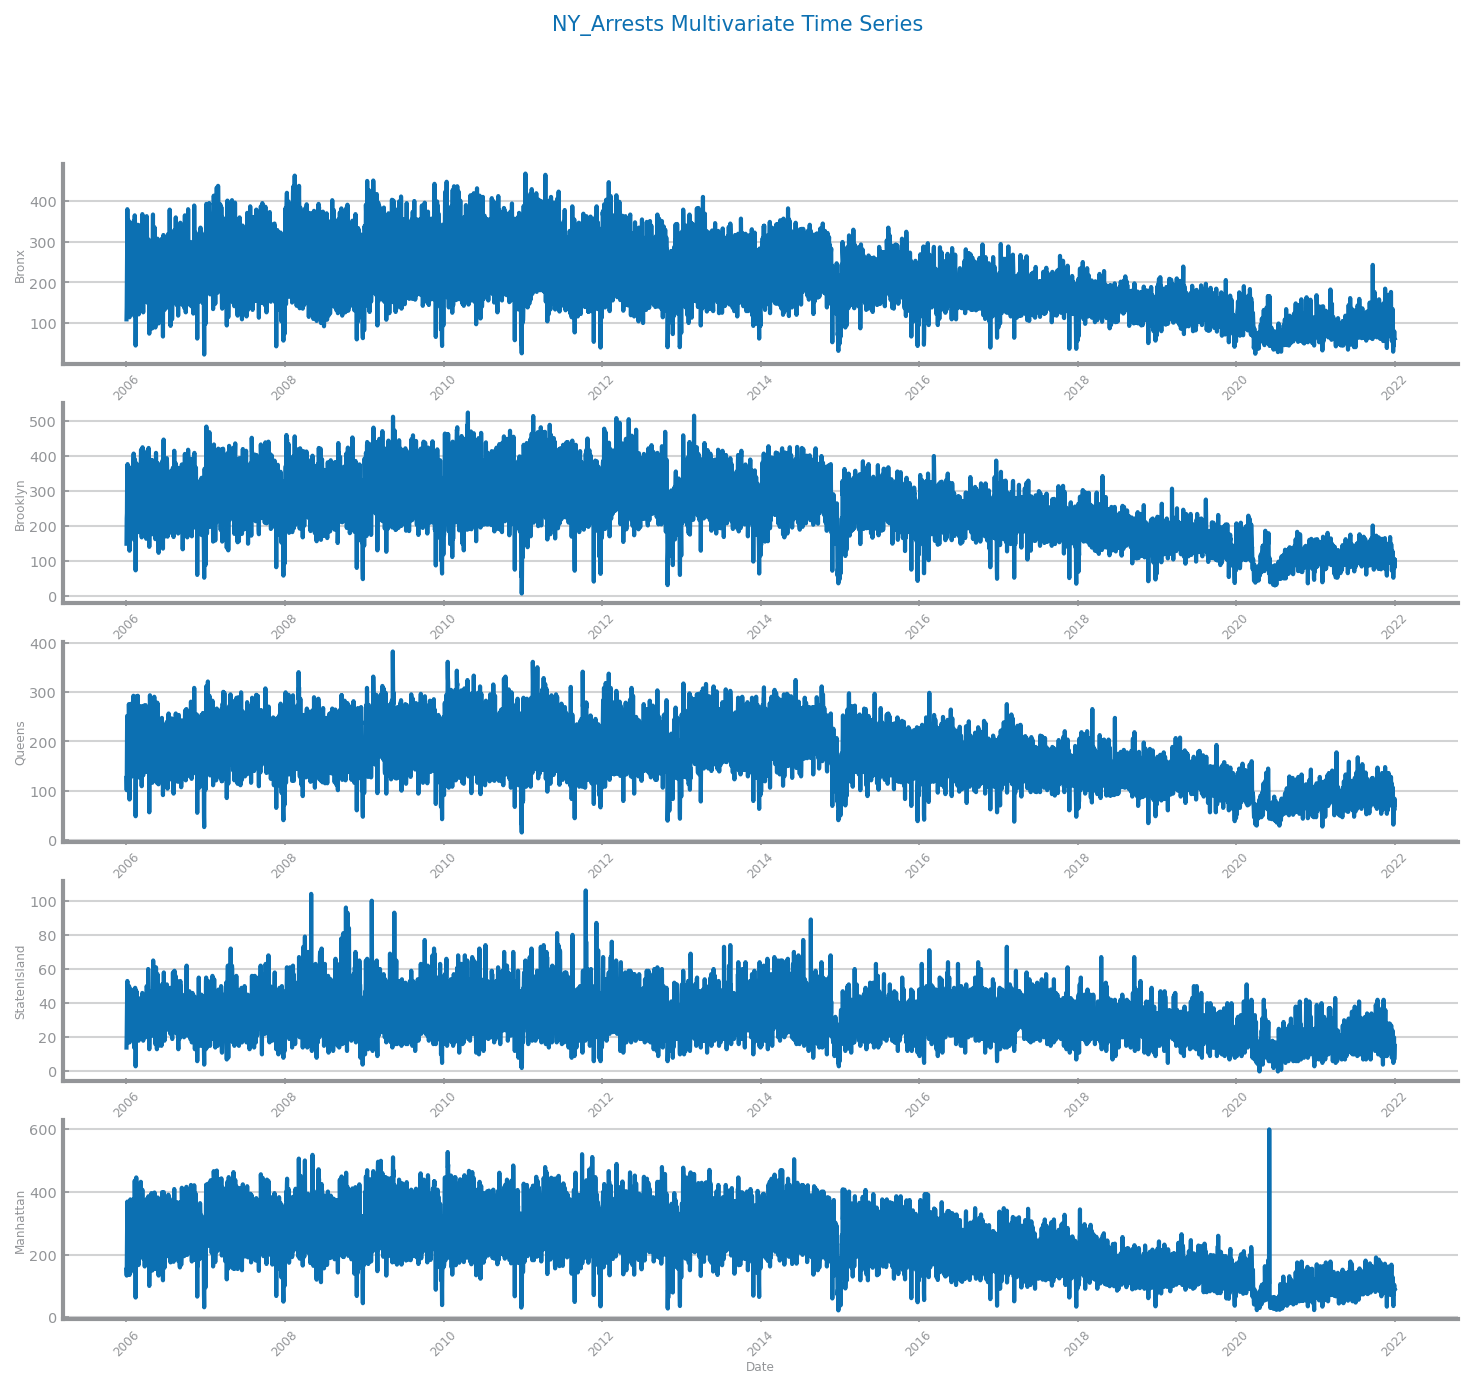

In [2]:
from pandas import read_csv, DataFrame
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, show
from matplotlib.figure import Figure
from dslabs_functions import plot_line_chart, HEIGHT

# Define the multivariate plot function
def plot_ts_multivariate_chart(data: DataFrame, title: str) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(3 * HEIGHT, HEIGHT / 2 * data.shape[1]))
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs

# File details
file_tag = "NY_Arrests"

# Load the dataset
data: DataFrame = read_csv(
    "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/forecast_ny_arrests.csv",
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=["Date"],  # Parse the Date column
    infer_datetime_format=True,
)

# Set the Date column as the index
data.set_index("Date", inplace=True)

# Print profiling information
print("Nr. Records =", data.shape)
print("First timestamp:", data.index[0])
print("Last timestamp:", data.index[-1])

# Plot the multivariate time series
plot_ts_multivariate_chart(data, title=f"{file_tag} Multivariate Time Series")
show()
